In [18]:
import pandas as pd
import numpy as np
import scipy
from matplotlib import pyplot as plt

In [14]:
time_series_r1 = np.random.normal(0.006, 0.05, size=(10000, 600))
time_series_r2 = np.random.normal(0.006, 0.05, size=(10000, 600))

In [17]:
df = pd.DataFrame([], columns = ['slope', 'intercept', 'r_value', 'p_value', 'std_err']);
for i in range(10000):
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(time_series_r1[i], time_series_r2[i])
    df.loc[len(df.index)] = [slope, intercept, r_value, p_value, std_err]
df['t_value'] = df['slope']/df['std_err']
df

,slope,intercept,r_value,p_value,std_err,t_value
0,0.009550,0.005056,0.010060,0.805746,0.038817,0.246027
1,0.031235,0.002706,0.029761,0.466836,0.042899,0.728102
2,-0.001117,0.005362,-0.001045,0.979613,0.043680,-0.025565
3,-0.029589,0.006039,-0.030489,0.456012,0.039668,-0.745915
4,-0.014034,0.006340,-0.014464,0.723661,0.039673,-0.353737
...,...,...,...,...,...,...
9995,0.048477,0.004667,0.048895,0.231733,0.040495,1.197123
9996,0.024001,0.008229,0.024830,0.543832,0.039516,0.607376
9997,-0.038893,0.005717,-0.039914,0.329042,0.039815,-0.976842
9998,0.072090,0.007790,0.069268,0.090036,0.042457,1.697957


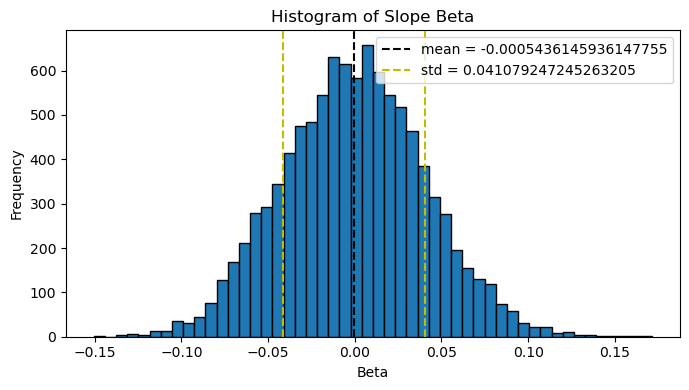

In [31]:
mean = df['slope'].mean()
std = df['slope'].std()

fig, axs = plt.subplots(1, 1, figsize =(7, 4), tight_layout = True)
axs.hist(df['slope'], bins = 50, edgecolor='k')

plt.axvline(mean, color='k', linestyle='dashed')
plt.axvline(mean+std, color='y', linestyle='dashed')
plt.axvline(mean-std, color='y', linestyle='dashed')

mean_str = "mean = %s" % mean
std_str = "std = %s" % std
legend = [mean_str, std_str]

plt.xlabel("Beta")
plt.ylabel("Frequency")
plt.legend(legend)
plt.title('Histogram of Slope Beta')
plt.show()

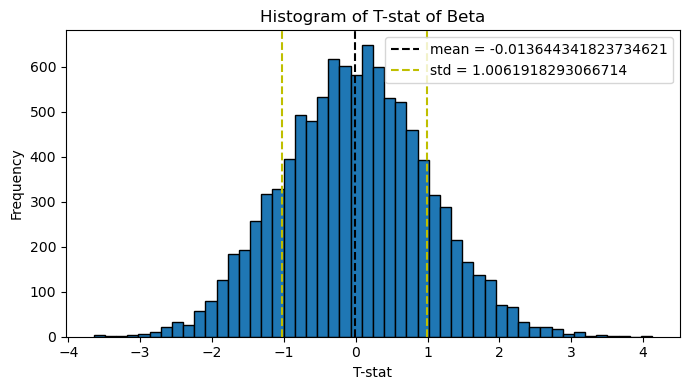

In [32]:
mean = df['t_value'].mean()
std = df['t_value'].std()

fig, axs = plt.subplots(1, 1, figsize =(7, 4), tight_layout = True)
axs.hist(df['t_value'], bins = 50, edgecolor='k')

plt.axvline(mean, color='k', linestyle='dashed')
plt.axvline(mean+std, color='y', linestyle='dashed')
plt.axvline(mean-std, color='y', linestyle='dashed')

mean_str = "mean = %s" % mean
std_str = "std = %s" % std
legend = [mean_str, std_str]

plt.xlabel("T-stat")
plt.ylabel("Frequency")
plt.legend(legend)
plt.title('Histogram of T-stat of Beta')
plt.show()

In [35]:
time_series_p1 = []
time_series_p2 = []
for i in range(10000):
    time_series_p1.append([])
    time_series_p2.append([])
    for j in range(600): 
        if j == 0:
            time_series_p1[i].append(time_series_r1[i][j])
            time_series_p2[i].append(time_series_r2[i][j])
        else:
            time_series_p1[i].append(time_series_p1[i][j-1] + time_series_r1[i][j])
            time_series_p2[i].append(time_series_p2[i][j-1] + time_series_r2[i][j])

In [36]:
df = pd.DataFrame([], columns = ['slope', 'intercept', 'r_value', 'p_value', 'std_err']);
for i in range(10000):
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(time_series_p1[i], time_series_p2[i])
    df.loc[len(df.index)] = [slope, intercept, r_value, p_value, std_err]
df['t_value'] = df['slope']/df['std_err']
df

,slope,intercept,r_value,p_value,std_err,t_value
0,0.370603,1.128050,0.685653,1.605651e-84,0.016090,23.033817
1,0.622253,-0.453555,0.925360,4.308805e-254,0.010424,59.692523
2,0.771860,0.543957,0.915071,5.161979e-238,0.013911,55.486200
3,1.432648,0.292723,0.946204,3.155802e-295,0.020034,71.509841
4,0.793357,-0.583688,0.944294,7.986826e-291,0.011307,70.165968
...,...,...,...,...,...,...
9995,0.817882,0.594580,0.949313,9.425154e-303,0.011074,73.853571
9996,1.933653,-0.401991,0.894064,9.793141e-211,0.039617,48.809012
9997,1.160485,-0.126368,0.955974,1.316191e-320,0.014567,79.663866
9998,1.034019,1.195731,0.929455,3.815492e-261,0.016784,61.606748


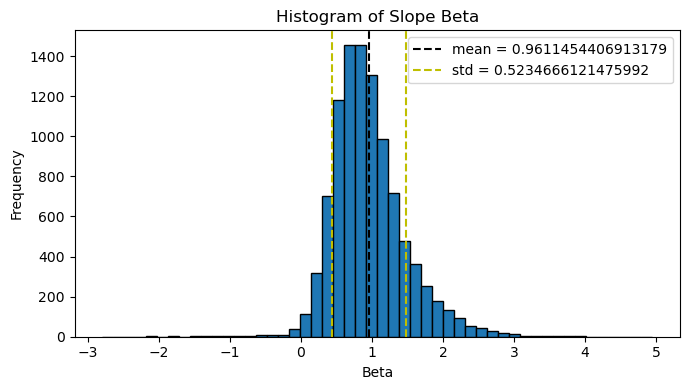

In [37]:
mean = df['slope'].mean()
std = df['slope'].std()

fig, axs = plt.subplots(1, 1, figsize =(7, 4), tight_layout = True)
axs.hist(df['slope'], bins = 50, edgecolor='k')

plt.axvline(mean, color='k', linestyle='dashed')
plt.axvline(mean+std, color='y', linestyle='dashed')
plt.axvline(mean-std, color='y', linestyle='dashed')

mean_str = "mean = %s" % mean
std_str = "std = %s" % std
legend = [mean_str, std_str]

plt.xlabel("Beta")
plt.ylabel("Frequency")
plt.legend(legend)
plt.title('Histogram of Slope Beta')
plt.show()

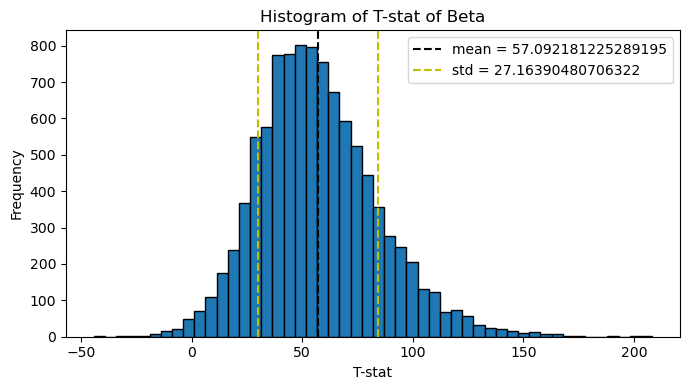

In [38]:
mean = df['t_value'].mean()
std = df['t_value'].std()

fig, axs = plt.subplots(1, 1, figsize =(7, 4), tight_layout = True)
axs.hist(df['t_value'], bins = 50, edgecolor='k')

plt.axvline(mean, color='k', linestyle='dashed')
plt.axvline(mean+std, color='y', linestyle='dashed')
plt.axvline(mean-std, color='y', linestyle='dashed')

mean_str = "mean = %s" % mean
std_str = "std = %s" % std
legend = [mean_str, std_str]

plt.xlabel("T-stat")
plt.ylabel("Frequency")
plt.legend(legend)
plt.title('Histogram of T-stat of Beta')
plt.show()